In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("IMDb-Movies-India.csv", encoding='latin1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
# Standardize column names (lowercase and strip spaces)
df.columns = df.columns.str.strip().str.lower()

# Combine actors into a single string
df['actors'] = df['actor 1'] + ', ' + df['actor 2'] + ', ' + df['actor 3']

# Select relevant columns
columns_to_use = ['genre', 'director', 'actors', 'rating']
df = df[columns_to_use]

# Drop missing values
df = df.dropna()

# Preview cleaned data
df.head()


,genre,director,actors,rating
1,Drama,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",7.0
3,"Comedy, Romance",Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor",4.4
5,"Comedy, Drama, Musical",Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",4.7
6,"Drama, Romance, War",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",7.4
8,"Horror, Mystery, Thriller",Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",5.6


In [7]:
# Use only first genre and top actor for simplicity
df['genre'] = df['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df['actors'] = df['actors'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# One-hot encode categorical features
x = df[['genre', 'director', 'actors']]
y = df['rating']

x_encoded = pd.get_dummies(x, drop_first=True)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Linear Regression R^2: ", r2_score(y_test, y_pred_lr))
print("MSE: ", mean_squared_error(y_test, y_pred_lr))

Linear Regression R^2:  -4.962345774122767e+25
MSE:  9.194419787792416e+25


In [10]:
rf = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R^2: 0.08024840242877096
MSE: 1.7041501486376234


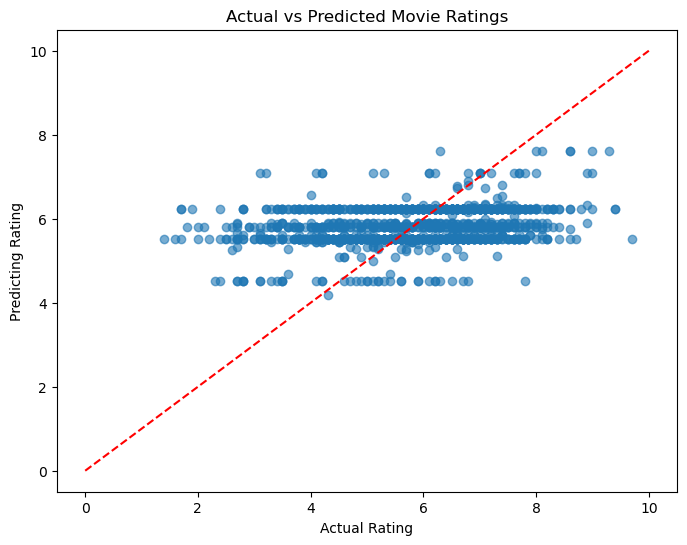

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicting Rating")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([0, 10], [0, 10], 'r--')
plt.show()